In [62]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

with open('./nightlight.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)
df = df.rename(columns={'key': 'state'})
df['vis_median'] = df['vis_median'].astype(float)
df.to_csv('NightLights.csv')

In [87]:
state_gdp = pd.read_csv('state_gdp/gdp_raw.csv')
with open('./nightlight.json') as f:
    data = json.load(f)
night_light = pd.read_csv('NightLights.csv')

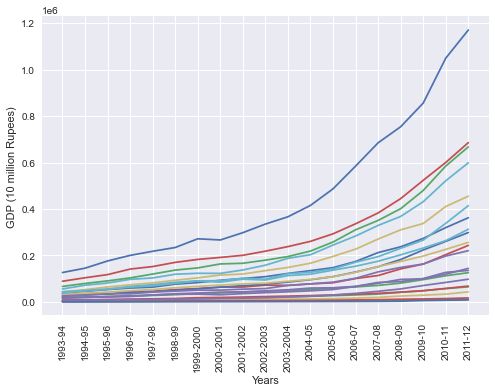

In [95]:
for i in range(22): plt.plot(state_gdp.iloc[i,1:20], label=state_gdp.iloc[i,0])
plt.xticks(rotation='vertical')
plt.xlabel('Years')
plt.ylabel('GDP (10 million Rupees)')
plt.show()

In [96]:
t = [np.median(night_light.loc[(night_light['state']=='assam') & (night_light['year'] == i)]['vis_median']) for i in range(1993,2014)]

Text(0, 0.5, 'Standardized GDP')

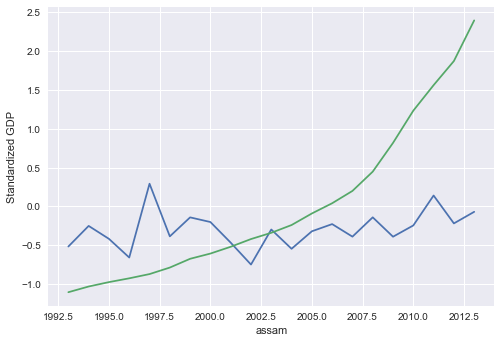

In [98]:
plt.plot(range(1993,2014), np.array(t))
plt.plot(range(1993,2014), preprocessing.scale(state_gdp.iloc[1].to_list()[1:22]))
plt.xlabel(state_gdp.iloc[1][0])
plt.ylabel('Standardized GDP')

In [32]:
t = [np.median(df.loc[(df['state']=='karnataka') & (df['year'] == i)]['vis_median']) for i in range(1993,2014)]

In [80]:
coeff = []
scores = []
for key,value in state_gdp.iterrows():
    state = value[0]
    gdp = value[1:22].to_list()
    light = np.array([np.median(df.loc[(df['state']==state) & (df['year'] == i)]['vis_median']) for i in range(1993,2014)]).reshape(-1,1)
    Y = preprocessing.scale(gdp)
    reg = LinearRegression(normalize=False).fit(light, Y)
    coeff.append(reg.coef_)
    scores.append(reg.score(light, Y))
d = {'States': state_gdp['State'].to_list(), 'score': scores, 'beta': coeff}
df = pd.DataFrame(data=d)
df.to_csv('regression.csv')

In [79]:
print(coeff)

[array([1.48022504]), array([1.52547549]), array([1.87245472]), array([1.88100335]), array([0.72216548]), array([1.92947205]), array([0.43740077]), array([1.16369999]), array([1.58857759]), array([1.37261853]), array([0.73277437]), array([2.38626893]), array([2.44210307]), array([0.76069012]), array([0.72392072]), array([2.2951884]), array([0.46818404]), array([1.51461585]), array([1.34091758]), array([0.81021562]), array([2.22186261]), array([1.47725105]), array([1.43285586]), array([0.07675616])]
